In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_matches = pd.read_csv('/Users/mayureshdongare/Desktop/CU Docs/Machine Learning/matches_cleaned.csv')
df_delivery = pd.read_csv('/Users/mayureshdongare/Desktop/CU Docs/Machine Learning/delivery_cleaned.csv')
df_orange_cap = pd.read_csv('/Users/mayureshdongare/Desktop/CU Docs/Machine Learning/orange_cap.csv')

In [3]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1095 non-null   int64 
 1   season           1095 non-null   object
 2   city             1095 non-null   object
 3   date             1095 non-null   object
 4   match_type       1095 non-null   object
 5   player_of_match  1095 non-null   object
 6   team1            1095 non-null   object
 7   team2            1095 non-null   object
 8   toss_winner      1095 non-null   object
 9   toss_decision    1095 non-null   object
 10  winner           1095 non-null   object
 11  result           1095 non-null   object
 12  result_margin    1095 non-null   object
 13  target_runs      1095 non-null   object
 14  target_overs     1095 non-null   object
 15  super_over       1095 non-null   object
 16  method           1095 non-null   object
 17  umpire1          1095 non-null   

In [4]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [5]:
df_orange_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         268 non-null    object 
 1   Season         268 non-null    object 
 2   Matches        268 non-null    int64  
 3   Innings        268 non-null    int64  
 4   Not Outs       268 non-null    object 
 5   Runs           268 non-null    object 
 6   Highest Score  268 non-null    object 
 7   Average        268 non-null    float64
 8   Balls Faced    268 non-null    int64  
 9   Strike Rate    268 non-null    float64
 10  100s           268 non-null    object 
 11  50s            268 non-null    object 
 12  Ducks          268 non-null    object 
 13  Fours          268 non-null    int64  
 14  Sixes          268 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 31.5+ KB


In [9]:
df_matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Delhi Capitals',
       'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans'],
      dtype=object)

In [8]:
def change_team_names(df):
    df.loc[df['toss_winner'] == 'Royal Challengers Bengaluru', 'toss_winner'] = 'Royal Challengers Bangalore'
    df.loc[df['team1'] == 'Royal Challengers Bengaluru', 'team1'] = 'Royal Challengers Bangalore'
    df.loc[df['team2'] == 'Royal Challengers Bengaluru', 'team2'] = 'Royal Challengers Bangalore'
    df.loc[df['winner'] == 'Royal Challengers Bengaluru', 'winner'] = 'Royal Challengers Bangalore'
    df.loc[df['toss_winner'] == 'Rising Pune Supergiant', 'toss_winner'] = 'Rising Pune Supergiants'
    df.loc[df['team1'] == 'Rising Pune Supergiant', 'team1'] = 'Rising Pune Supergiants'
    df.loc[df['team2'] == 'Rising Pune Supergiant', 'team2'] = 'Rising Pune Supergiants'
    df.loc[df['winner'] == 'Rising Pune Supergiant', 'winner'] = 'Rising Pune Supergiants'
change_team_names(df_matches)

In [10]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1095 non-null   int64 
 1   season           1095 non-null   object
 2   city             1095 non-null   object
 3   date             1095 non-null   object
 4   match_type       1095 non-null   object
 5   player_of_match  1095 non-null   object
 6   team1            1095 non-null   object
 7   team2            1095 non-null   object
 8   toss_winner      1095 non-null   object
 9   toss_decision    1095 non-null   object
 10  winner           1095 non-null   object
 11  result           1095 non-null   object
 12  result_margin    1095 non-null   object
 13  target_runs      1095 non-null   object
 14  target_overs     1095 non-null   object
 15  super_over       1095 non-null   object
 16  method           1095 non-null   object
 17  umpire1          1095 non-null   

In [27]:
df_matches.head()

,id,season,city,date,match_type,player_of_match,team1,team2,toss_winner,toss_decision,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,seasons,venue,toss_impact
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,140.0,223.0,20.0,N,No DLS,Asad Rauf,RE Koertzen,2008,M Chinnaswamy Stadium,0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,33.0,241.0,20.0,N,No DLS,MR Benson,SL Shastri,2008,Punjab Cricket Association Stadium,1
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,...,9.0,130.0,20.0,N,No DLS,Aleem Dar,GA Pratapkumar,2008,Feroz Shah Kotla,0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,5.0,166.0,20.0,N,No DLS,SJ Davis,DJ Harper,2008,Wankhede Stadium,0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,5.0,111.0,20.0,N,No DLS,BF Bowden,K Hariharan,2008,Eden Gardens,0


In [13]:
df_matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [15]:
matches_file_path = 'matches_cleaned.csv'

df_matches.to_csv(matches_file_path, index=False)

# 1. Data Preparation for Toss Decision Impact on Match Outcomes


In [16]:
# Selecting relevant columns and create binary outcome (Win/Loss) for toss impact
df_matches['toss_impact'] = (df_matches['toss_winner'] == df_matches['winner']).astype(int)  # 1 if toss winner wins, else 0

# Filter necessary columns
df_toss_impact = df_matches[['toss_decision', 'team1', 'team2', 'venue', 'toss_impact']]

# Split into training and testing
X_toss = df_toss_impact[['toss_decision', 'team1', 'team2', 'venue']]
y_toss = df_toss_impact['toss_impact']
X_toss_train, X_toss_test, y_toss_train, y_toss_test = train_test_split(X_toss, y_toss, test_size=0.2, random_state=42)

In [26]:
df_toss_impact.head(10)

,toss_decision,team1,team2,venue,toss_impact
0,field,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,0
1,bat,Kings XI Punjab,Chennai Super Kings,Punjab Cricket Association Stadium,1
2,bat,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,0
3,bat,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,0
4,bat,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,0
5,bat,Rajasthan Royals,Kings XI Punjab,Sawai Mansingh Stadium,0
6,bat,Deccan Chargers,Delhi Daredevils,Rajiv Gandhi International Cricket Stadium,0
7,field,Chennai Super Kings,Mumbai Indians,MA Chidambaram Stadium,0
8,field,Deccan Chargers,Rajasthan Royals,Rajiv Gandhi International Cricket Stadium,1
9,field,Kings XI Punjab,Mumbai Indians,Punjab Cricket Association Stadium,0


# 2. Data Preparation for Result Margin and Team Dominance

In [29]:
# Convert result_margin to numeric, coerce errors to NaN for handling non-numeric values
df_matches['result_margin'] = pd.to_numeric(df_matches['result_margin'], errors='coerce')

# Fill any NaN values with a default (e.g., 0) if required for further processing
df_matches['result_margin'].fillna(0, inplace=True)

# Define dominance levels based on result margin
def classify_dominance(margin):
    if margin > 50:
        return 2  # High dominance
    elif margin > 20:
        return 1  # Medium dominance
    else:
        return 0  # Low dominance

# Apply the classification function
df_matches['dominance_level'] = df_matches['result_margin'].apply(classify_dominance)

# Filter necessary columns
df_dominance = df_matches[['result_margin', 'toss_decision', 'team1', 'team2', 'venue', 'dominance_level']]

# Split into training and testing sets
X_dom = df_dominance[['result_margin', 'toss_decision', 'team1', 'team2', 'venue']]
y_dom = df_dominance['dominance_level']
X_dom_train, X_dom_test, y_dom_train, y_dom_test = train_test_split(X_dom, y_dom, test_size=0.2, random_state=42)

In [32]:
df_dominance.head(10)

,result_margin,toss_decision,team1,team2,venue,dominance_level
0,140.0,field,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,2
1,33.0,bat,Kings XI Punjab,Chennai Super Kings,Punjab Cricket Association Stadium,1
2,9.0,bat,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,0
3,5.0,bat,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,0
4,5.0,bat,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,0
5,6.0,bat,Rajasthan Royals,Kings XI Punjab,Sawai Mansingh Stadium,0
6,9.0,bat,Deccan Chargers,Delhi Daredevils,Rajiv Gandhi International Cricket Stadium,0
7,6.0,field,Chennai Super Kings,Mumbai Indians,MA Chidambaram Stadium,0
8,3.0,field,Deccan Chargers,Rajasthan Royals,Rajiv Gandhi International Cricket Stadium,0
9,66.0,field,Kings XI Punjab,Mumbai Indians,Punjab Cricket Association Stadium,2


# 3. Data Preparation for Toss Winners' Influence on Match Outcome

In [57]:
df_matches['toss_winner_won'] = (df_matches['toss_winner'] == df_matches['winner']).astype(int)

# Filter necessary columns for this analysis
df_toss_influence = df_matches[['toss_winner', 'team1', 'team2', 'venue', 'toss_decision', 'toss_winner_won']]

# Split into training and testing sets
X_toss_influence = df_toss_influence[['toss_winner', 'team1', 'team2', 'venue', 'toss_decision']]
y_toss_influence = df_toss_influence['toss_winner_won']
X_toss_winner_train, X_toss_winner_test, y_toss_winner_train, y_toss_winner_test = train_test_split(X_toss_influence, y_toss_influence, test_size=0.2, random_state=42)


In [35]:
df_toss_influence.head(10)

,toss_winner,team1,team2,venue,toss_decision,toss_winner_won
0,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,field,0
1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,Punjab Cricket Association Stadium,bat,1
2,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,bat,0
3,Mumbai Indians,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,bat,0
4,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,bat,0
5,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,Sawai Mansingh Stadium,bat,0
6,Deccan Chargers,Deccan Chargers,Delhi Daredevils,Rajiv Gandhi International Cricket Stadium,bat,0
7,Mumbai Indians,Chennai Super Kings,Mumbai Indians,MA Chidambaram Stadium,field,0
8,Rajasthan Royals,Deccan Chargers,Rajasthan Royals,Rajiv Gandhi International Cricket Stadium,field,1
9,Mumbai Indians,Kings XI Punjab,Mumbai Indians,Punjab Cricket Association Stadium,field,0


# 4. Data Preparation for Player Dismissal Patterns for Game Strategy

In [36]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [42]:
df_delivery['dismissal_kind'].unique()

array(['No Dismissal', 'caught', 'bowled', 'run out', 'lbw',
       'retired hurt', 'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [39]:
# Filter the necessary columns (without 'venue')
df_dismissal_patterns = df_delivery[['batting_team', 'bowling_team', 'over', 'ball', 'dismissal_kind']].copy()

# Convert dismissal types to categorical labels
df_dismissal_patterns.loc[:, 'dismissal_type'] = df_dismissal_patterns['dismissal_kind'].astype('category').cat.codes

# Select features and target
X_dismissal = df_dismissal_patterns[['batting_team', 'bowling_team', 'over', 'ball']]
y_dismissal = df_dismissal_patterns['dismissal_type']

# Split the dataset
X_dismissal_train, X_dismissal_test, y_dismissal_train, y_dismissal_test = train_test_split(X_dismissal, y_dismissal, test_size=0.2, random_state=42)

In [43]:
df_dismissal_patterns['dismissal_type'].unique()

array([ 0,  2,  1,  9,  5,  7, 10,  3,  4,  6,  8], dtype=int8)

In [44]:
# Display dismissal types with their corresponding dismissal kinds
dismissal_kinds = df_dismissal_patterns['dismissal_kind'].astype('category')
dismissal_codes = dismissal_kinds.cat.codes.unique()
dismissal_categories = dismissal_kinds.cat.categories

# Display as pairs
for code, kind in zip(dismissal_codes, dismissal_categories):
    print(f"{code}: {kind}")


0: No Dismissal
2: bowled
1: caught
9: caught and bowled
5: hit wicket
7: lbw
10: obstructing the field
3: retired hurt
4: retired out
6: run out
8: stumped


In [45]:
df_dismissal_patterns.head(10)

,batting_team,bowling_team,over,ball,dismissal_kind,dismissal_type
0,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,No Dismissal,0
1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,No Dismissal,0
2,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,No Dismissal,0
3,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,No Dismissal,0
4,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,No Dismissal,0
5,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,No Dismissal,0
6,Kolkata Knight Riders,Royal Challengers Bangalore,0,7,No Dismissal,0
7,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,No Dismissal,0
8,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,No Dismissal,0
9,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,No Dismissal,0


In [48]:
df_delivery

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,No,No Dismissal,N
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,No,No Dismissal,N
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,No,No Dismissal,N
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,No,No Dismissal,N
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,No,No Dismissal,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,No Extra,0,No,No Dismissal,N
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,No Extra,0,No,No Dismissal,N
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,No Extra,0,No,No Dismissal,N
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,No Extra,0,No,No Dismissal,N


In [49]:
df_matches

,id,season,city,date,match_type,player_of_match,team1,team2,toss_winner,toss_decision,...,target_overs,super_over,method,umpire1,umpire2,seasons,venue,toss_impact,dominance_level,toss_winner_won
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,20.0,N,No DLS,Asad Rauf,RE Koertzen,2008,M Chinnaswamy Stadium,0,2,0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,20.0,N,No DLS,MR Benson,SL Shastri,2008,Punjab Cricket Association Stadium,1,1,1
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,...,20.0,N,No DLS,Aleem Dar,GA Pratapkumar,2008,Feroz Shah Kotla,0,0,0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,20.0,N,No DLS,SJ Davis,DJ Harper,2008,Wankhede Stadium,0,0,0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,20.0,N,No DLS,BF Bowden,K Hariharan,2008,Eden Gardens,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,...,20.0,N,No DLS,Nitin Menon,VK Sharma,2024,Rajiv Gandhi International Cricket Stadium,0,0,0
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,...,20.0,N,No DLS,AK Chaudhary,R Pandit,2024,"Narendra Modi Stadium, Ahmedabad",0,0,0
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,...,20.0,N,No DLS,KN Ananthapadmanabhan,MV Saidharshan Kumar,2024,"Narendra Modi Stadium, Ahmedabad",1,0,1
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,...,20.0,N,No DLS,Nitin Menon,VK Sharma,2024,MA Chidambaram Stadium,0,1,0


# 5. Data Preparation for Consistent Player or Team Performance at Venues


In [59]:
# Ensure 'match_id' exists in both datasets
df_combined = df_delivery.merge(df_matches[['id', 'venue']], left_on='match_id', right_on='id', how='left')

# Verify columns and proceed if 'venue' is now in the combined DataFrame
df_player_venue = df_combined.groupby(['batter', 'venue']).agg({
    'batsman_runs': 'sum',  # Total runs scored by player at each venue
    'total_runs': 'sum',    # Total team runs at each venue
}).reset_index()

# Define performance threshold for "Consistent" (e.g., total runs > 100)
def label_performance(runs):
    return 1 if runs > 100 else 0

df_player_venue['consistent_performance'] = df_player_venue['batsman_runs'].apply(label_performance)

# Select relevant columns for model input
X_venue = df_player_venue[['batsman_runs', 'total_runs', 'venue']]
y_venue = df_player_venue['consistent_performance']

# Split the data
X_performance_train, X_performance_test, y_performance_train, y_performance_test = train_test_split(X_venue, y_venue, test_size=0.2, random_state=42)

In [52]:
df_player_venue.head(10)

,batter,venue,batsman_runs,total_runs,consistent_performance
0,A Ashish Reddy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,28,29,0
1,A Ashish Reddy,Eden Gardens,4,4,0
2,A Ashish Reddy,Feroz Shah Kotla,16,16,0
3,A Ashish Reddy,M Chinnaswamy Stadium,35,35,0
4,A Ashish Reddy,MA Chidambaram Stadium,39,39,0
5,A Ashish Reddy,Maharashtra Cricket Association Stadium,19,19,0
6,A Ashish Reddy,Punjab Cricket Association Stadium,22,22,0
7,A Ashish Reddy,Rajiv Gandhi International Cricket Stadium,93,100,0
8,A Ashish Reddy,Sawai Mansingh Stadium,14,14,0
9,A Ashish Reddy,Wankhede Stadium,10,10,0


Toss Decision Impact on Match Outcomes

MultinomialNB Results:
Accuracy: 0.52
Confusion Matrix:
 [[67 40]
 [66 46]]

BernoulliNB Results:
Accuracy: 0.56
Confusion Matrix:
 [[36 71]
 [25 87]]

CategoricalNB Results:
Accuracy: 0.54
Confusion Matrix:
 [[47 60]
 [41 71]]


In [89]:
# Function to apply and evaluate Naive Bayes models
def apply_naive_bayes(X_train, X_test, y_train, y_test, model_type):
    # Initialize the Naive Bayes model based on the chosen type
    if model_type == 'MultinomialNB':
        model = MultinomialNB()
    elif model_type == 'BernoulliNB':
        model = BernoulliNB()
    elif model_type == 'CategoricalNB':
        model = CategoricalNB()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_type} Confusion Matrix (Accuracy: {accuracy:.2f})')
    plt.show()
    
    # Display results
    print(f"\n{model_type} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", conf_matrix)

Toss Decision Impact on Match Outcomes


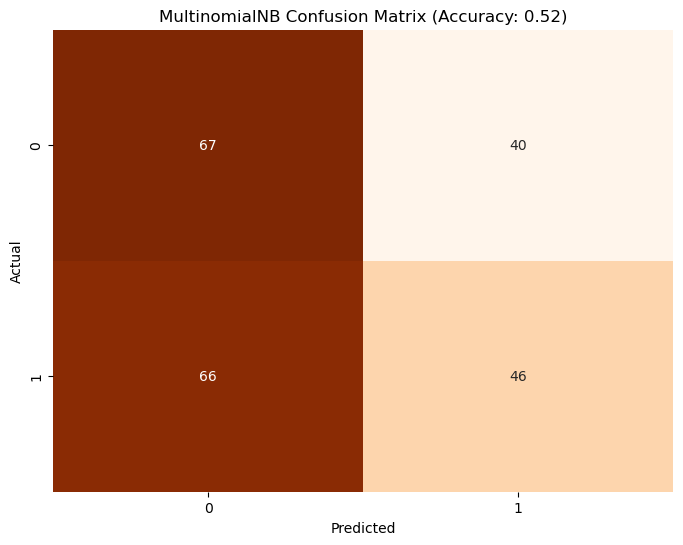


MultinomialNB Results:
Accuracy: 0.52
Confusion Matrix:
 [[67 40]
 [66 46]]


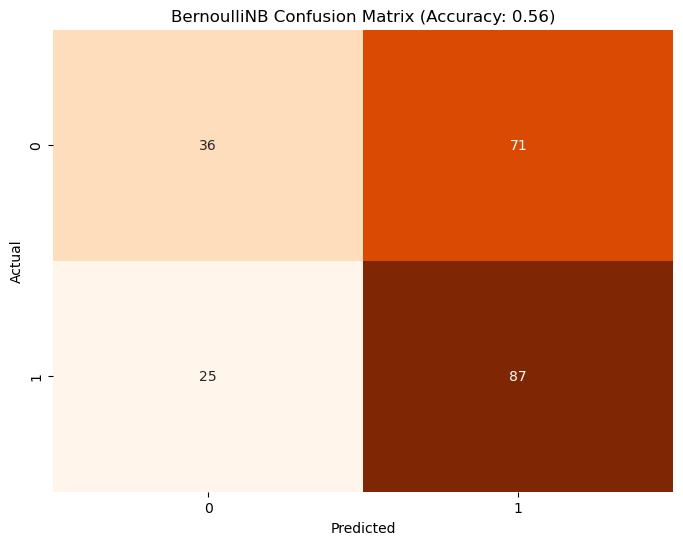


BernoulliNB Results:
Accuracy: 0.56
Confusion Matrix:
 [[36 71]
 [25 87]]


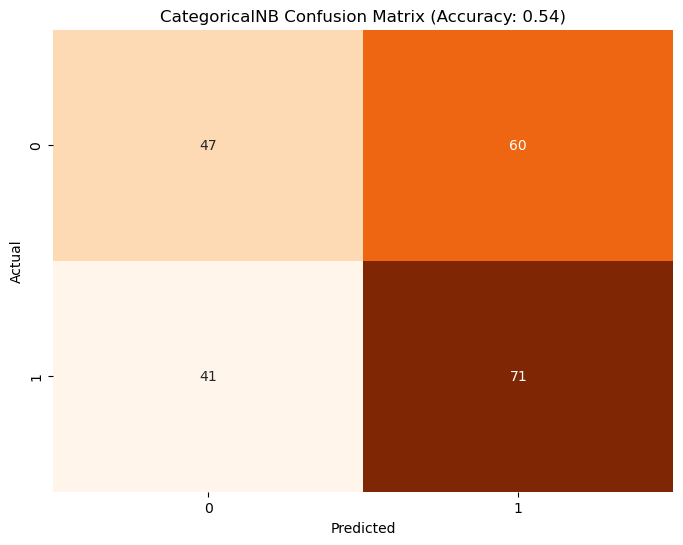


CategoricalNB Results:
Accuracy: 0.54
Confusion Matrix:
 [[47 60]
 [41 71]]

Result Margin and Team Dominance


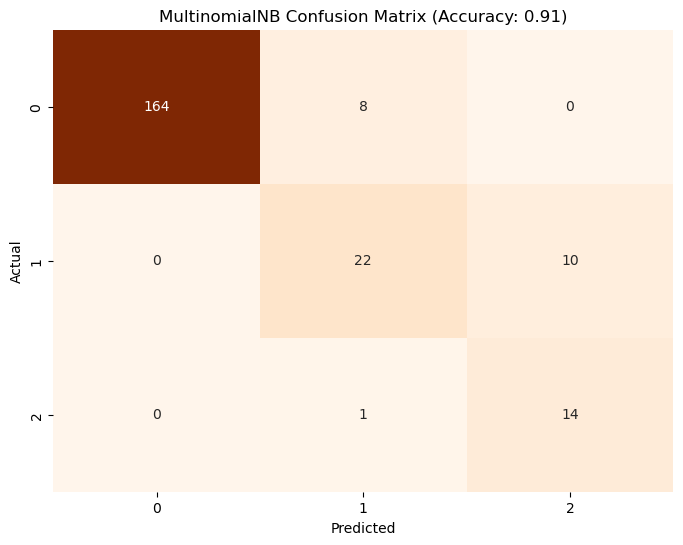


MultinomialNB Results:
Accuracy: 0.91
Confusion Matrix:
 [[164   8   0]
 [  0  22  10]
 [  0   1  14]]


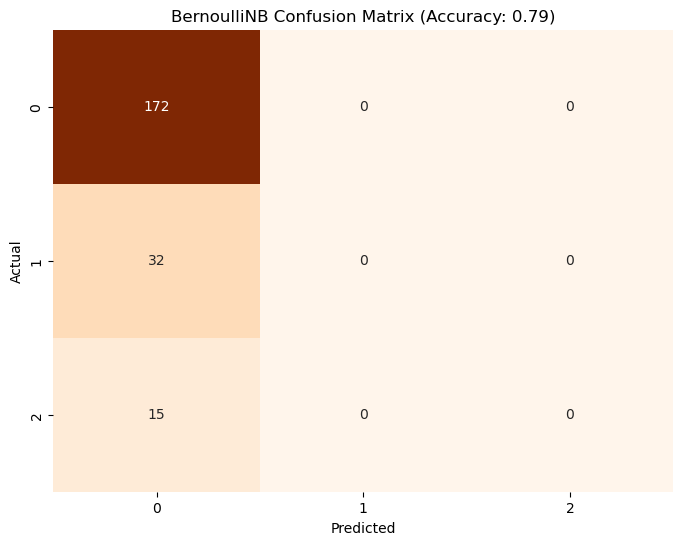


BernoulliNB Results:
Accuracy: 0.79
Confusion Matrix:
 [[172   0   0]
 [ 32   0   0]
 [ 15   0   0]]


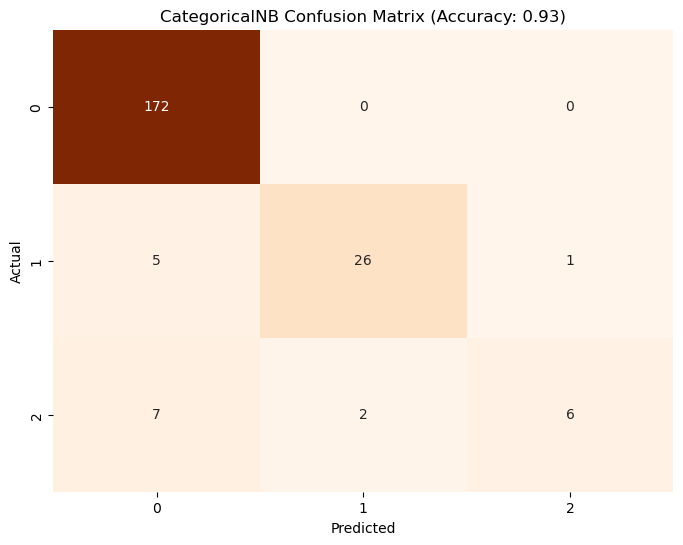


CategoricalNB Results:
Accuracy: 0.93
Confusion Matrix:
 [[172   0   0]
 [  5  26   1]
 [  7   2   6]]

Toss Winners' Influence on Match Outcome


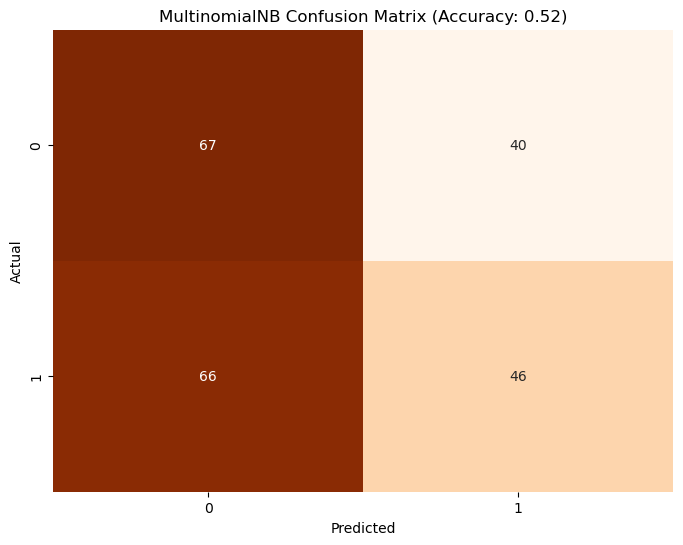


MultinomialNB Results:
Accuracy: 0.52
Confusion Matrix:
 [[67 40]
 [66 46]]


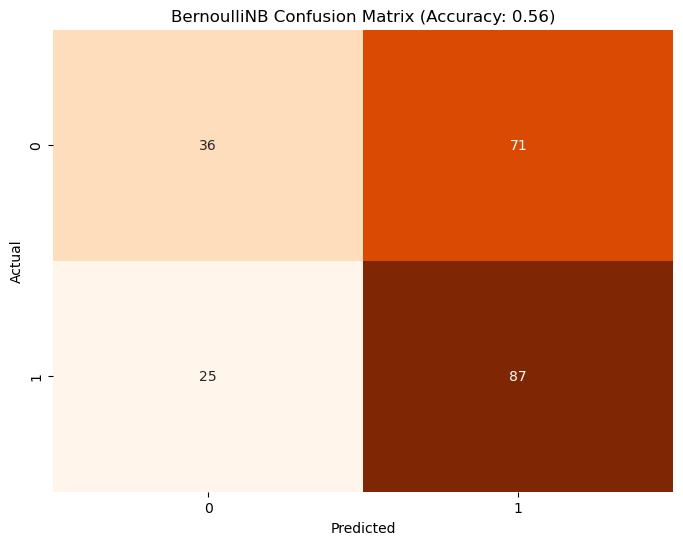


BernoulliNB Results:
Accuracy: 0.56
Confusion Matrix:
 [[36 71]
 [25 87]]


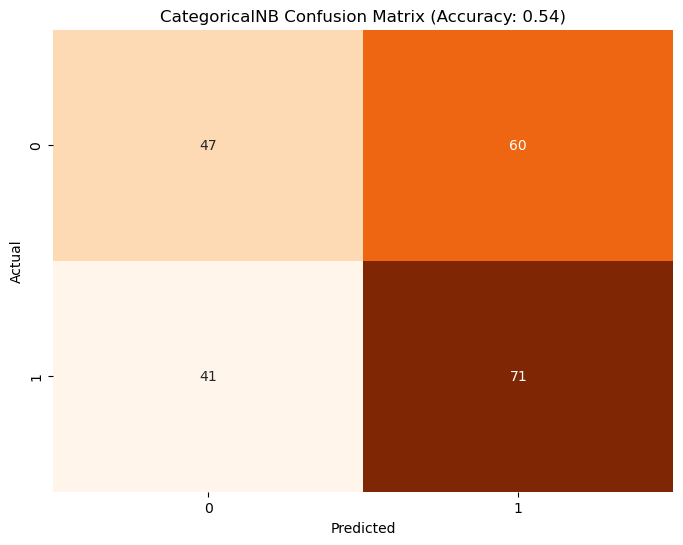


CategoricalNB Results:
Accuracy: 0.54
Confusion Matrix:
 [[47 60]
 [41 71]]

Player Dismissal Patterns for Game Strategy


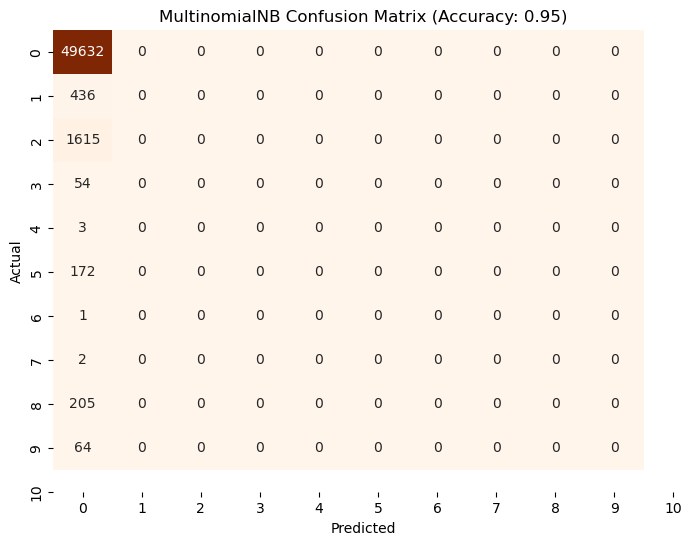


MultinomialNB Results:
Accuracy: 0.95
Confusion Matrix:
 [[49632     0     0     0     0     0     0     0     0     0]
 [  436     0     0     0     0     0     0     0     0     0]
 [ 1615     0     0     0     0     0     0     0     0     0]
 [   54     0     0     0     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0     0     0     0]
 [  172     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0]
 [    2     0     0     0     0     0     0     0     0     0]
 [  205     0     0     0     0     0     0     0     0     0]
 [   64     0     0     0     0     0     0     0     0     0]]


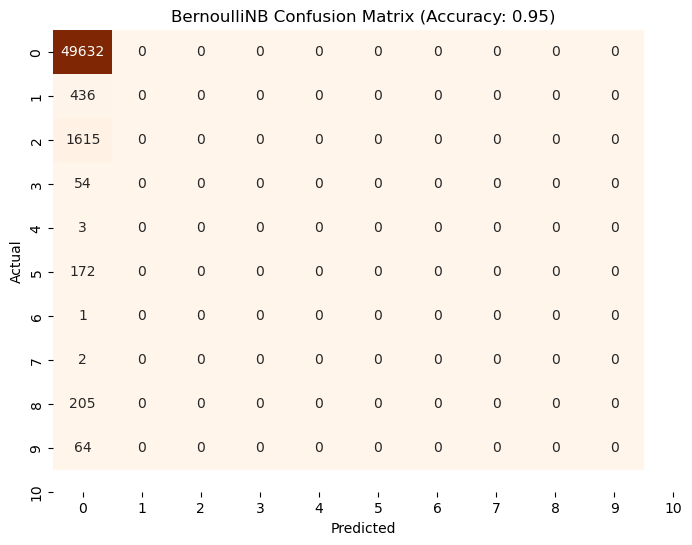


BernoulliNB Results:
Accuracy: 0.95
Confusion Matrix:
 [[49632     0     0     0     0     0     0     0     0     0]
 [  436     0     0     0     0     0     0     0     0     0]
 [ 1615     0     0     0     0     0     0     0     0     0]
 [   54     0     0     0     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0     0     0     0]
 [  172     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0]
 [    2     0     0     0     0     0     0     0     0     0]
 [  205     0     0     0     0     0     0     0     0     0]
 [   64     0     0     0     0     0     0     0     0     0]]


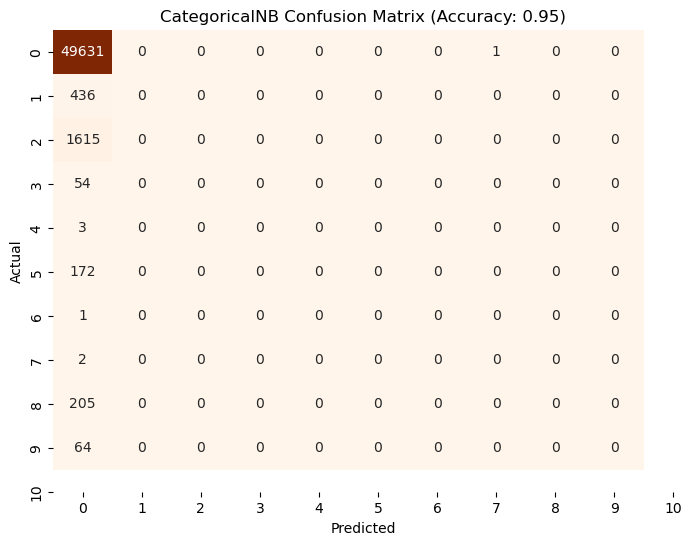


CategoricalNB Results:
Accuracy: 0.95
Confusion Matrix:
 [[49631     0     0     0     0     0     0     1     0     0]
 [  436     0     0     0     0     0     0     0     0     0]
 [ 1615     0     0     0     0     0     0     0     0     0]
 [   54     0     0     0     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0     0     0     0]
 [  172     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0]
 [    2     0     0     0     0     0     0     0     0     0]
 [  205     0     0     0     0     0     0     0     0     0]
 [   64     0     0     0     0     0     0     0     0     0]]

Consistent Player or Team Performance at Venues


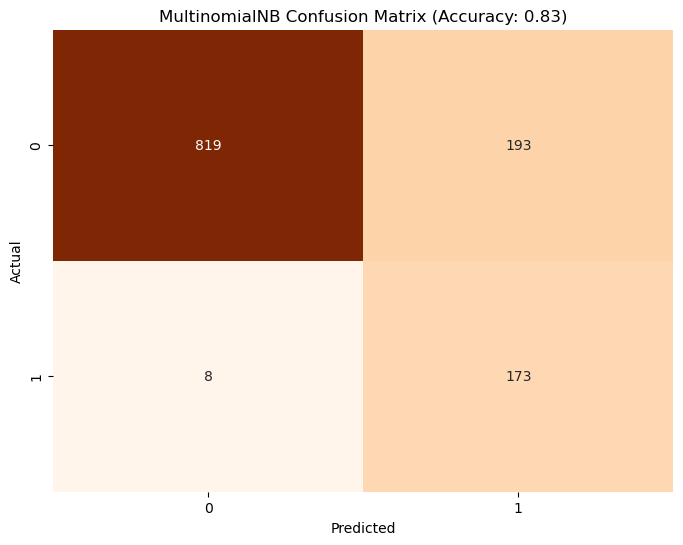


MultinomialNB Results:
Accuracy: 0.83
Confusion Matrix:
 [[819 193]
 [  8 173]]


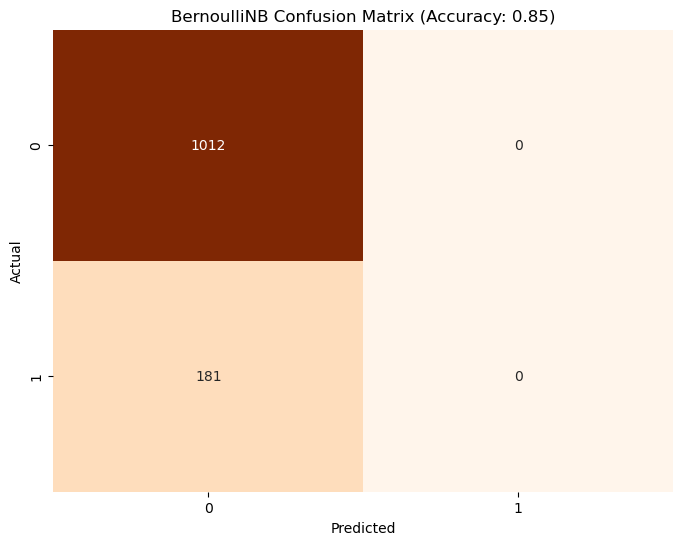


BernoulliNB Results:
Accuracy: 0.85
Confusion Matrix:
 [[1012    0]
 [ 181    0]]


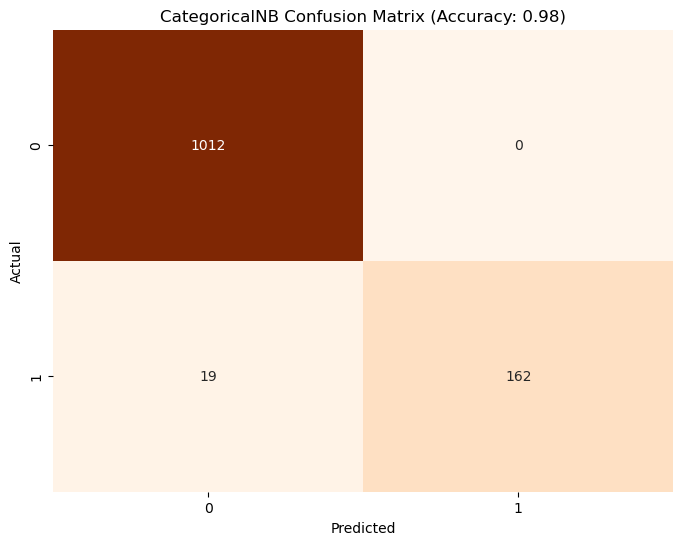


CategoricalNB Results:
Accuracy: 0.98
Confusion Matrix:
 [[1012    0]
 [  19  162]]


In [90]:
# Define a function to label-encode all categorical features in a dataset
def label_encode_df(df):
    label_encoders = {}
    for column in df.columns:
        if df[column].dtype == 'object':
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
            label_encoders[column] = le
    return df, label_encoders

# Apply label encoding to our feature datasets
X_toss_train_encoded, toss_encoders = label_encode_df(X_toss_train.copy())
X_toss_test_encoded, _ = label_encode_df(X_toss_test.copy())

X_dom_train_encoded, dom_encoders = label_encode_df(X_dom_train.copy())
X_dom_test_encoded, _ = label_encode_df(X_dom_test.copy())

X_toss_winner_train_encoded, toss_winner_encoders = label_encode_df(X_toss_winner_train.copy())
X_toss_winner_test_encoded, _ = label_encode_df(X_toss_winner_test.copy())

X_dismissal_train_encoded, dismissal_encoders = label_encode_df(X_dismissal_train.copy())
X_dismissal_test_encoded, _ = label_encode_df(X_dismissal_test.copy())

X_venue_perf_train_encoded, venue_perf_encoders = label_encode_df(X_performance_train.copy())
X_venue_perf_test_encoded, _ = label_encode_df(X_performance_test.copy())

# Now run the Naive Bayes function on the encoded datasets
print("Toss Decision Impact on Match Outcomes")
apply_naive_bayes(X_toss_train_encoded, X_toss_test_encoded, y_toss_train, y_toss_test, 'MultinomialNB')
apply_naive_bayes(X_toss_train_encoded, X_toss_test_encoded, y_toss_train, y_toss_test, 'BernoulliNB')
apply_naive_bayes(X_toss_train_encoded, X_toss_test_encoded, y_toss_train, y_toss_test, 'CategoricalNB')


# 2. Result Margin and Team Dominance (BernoulliNB example)
print("\nResult Margin and Team Dominance")
apply_naive_bayes(X_dom_train_encoded, X_dom_test_encoded, y_dom_train, y_dom_test, 'MultinomialNB')
apply_naive_bayes(X_dom_train_encoded, X_dom_test_encoded, y_dom_train, y_dom_test, 'BernoulliNB')
apply_naive_bayes(X_dom_train_encoded, X_dom_test_encoded, y_dom_train, y_dom_test, 'CategoricalNB')

# 3. Toss Winners' Influence on Match Outcome (BernoulliNB example)
print("\nToss Winners' Influence on Match Outcome")
apply_naive_bayes(X_toss_winner_train_encoded, X_toss_winner_test_encoded, y_toss_winner_train, y_toss_winner_test, 'MultinomialNB')
apply_naive_bayes(X_toss_winner_train_encoded, X_toss_winner_test_encoded, y_toss_winner_train, y_toss_winner_test, 'BernoulliNB')
apply_naive_bayes(X_toss_winner_train_encoded, X_toss_winner_test_encoded, y_toss_winner_train, y_toss_winner_test, 'CategoricalNB')

# 4. Player Dismissal Patterns for Game Strategy (CategoricalNB example)
print("\nPlayer Dismissal Patterns for Game Strategy")
apply_naive_bayes(X_dismissal_train_encoded, X_dismissal_test_encoded, y_dismissal_train, y_dismissal_test, 'MultinomialNB')
apply_naive_bayes(X_dismissal_train_encoded, X_dismissal_test_encoded, y_dismissal_train, y_dismissal_test, 'BernoulliNB')
apply_naive_bayes(X_dismissal_train_encoded, X_dismissal_test_encoded, y_dismissal_train, y_dismissal_test, 'CategoricalNB')

# 5. Consistent Player or Team Performance at Venues (MultinomialNB example)
print("\nConsistent Player or Team Performance at Venues")
apply_naive_bayes(X_venue_perf_train_encoded, X_venue_perf_test_encoded, y_performance_train, y_performance_test, 'MultinomialNB')
apply_naive_bayes(X_venue_perf_train_encoded, X_venue_perf_test_encoded, y_performance_train, y_performance_test, 'BernoulliNB')
apply_naive_bayes(X_venue_perf_train_encoded, X_venue_perf_test_encoded, y_performance_train, y_performance_test, 'CategoricalNB')

Toss Decision Impact on Match Outcomes
Decision Tree Accuracy: 0.57
Confusion Matrix:
 [[36 71]
 [23 89]]


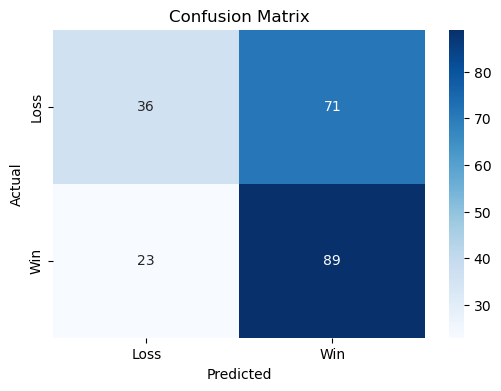

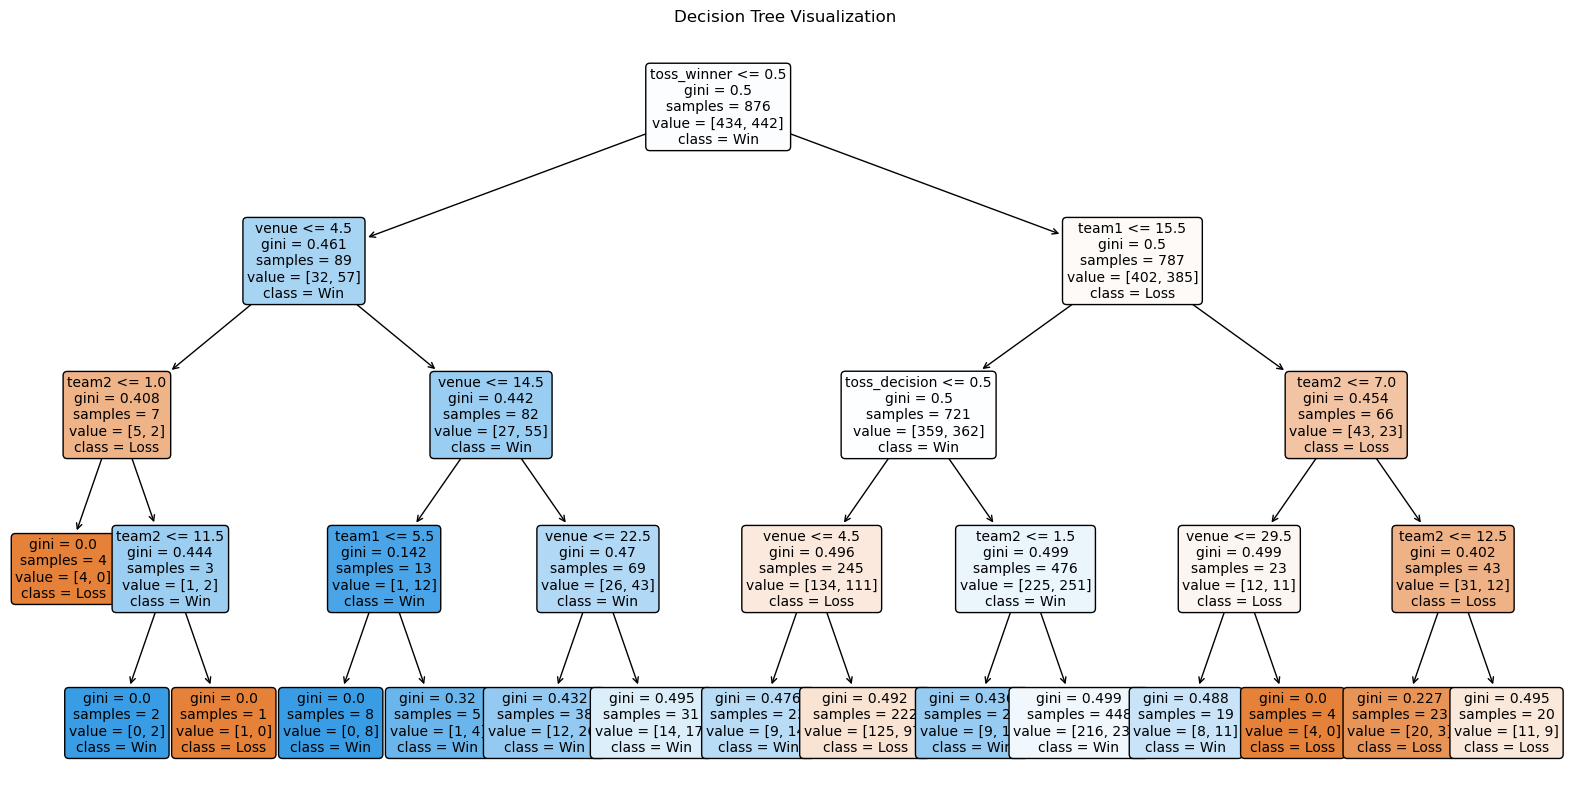


Result Margin and Team Dominance
Decision Tree Accuracy: 1.00
Confusion Matrix:
 [[172   0   0]
 [  0  32   0]
 [  0   0  15]]


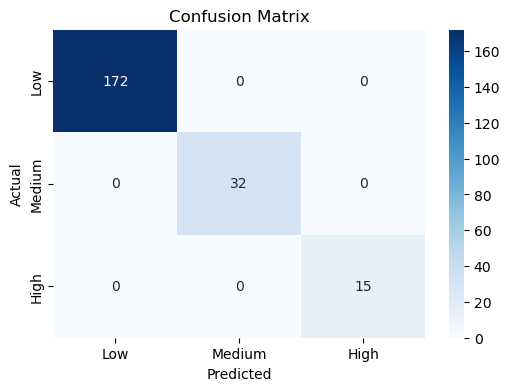

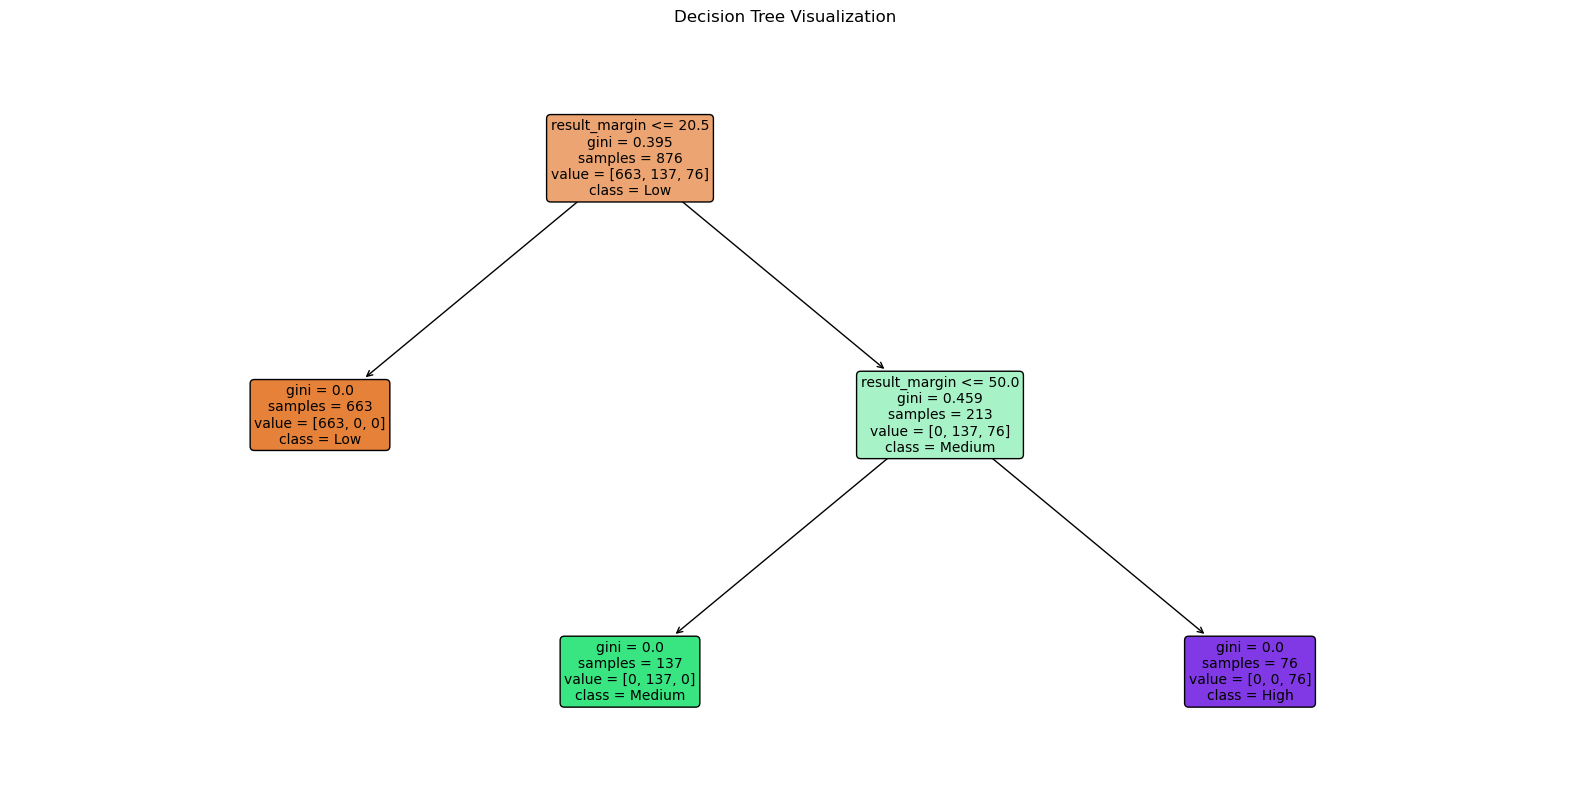


Toss Winners' Influence on Match Outcome
Decision Tree Accuracy: 0.57
Confusion Matrix:
 [[36 71]
 [23 89]]


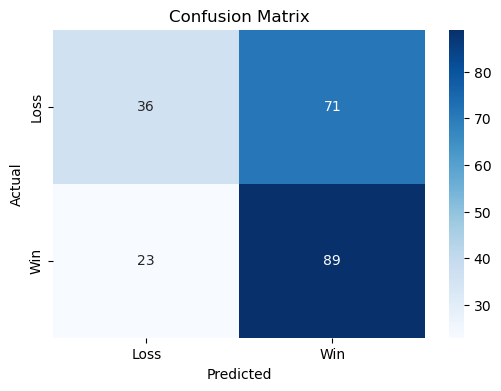

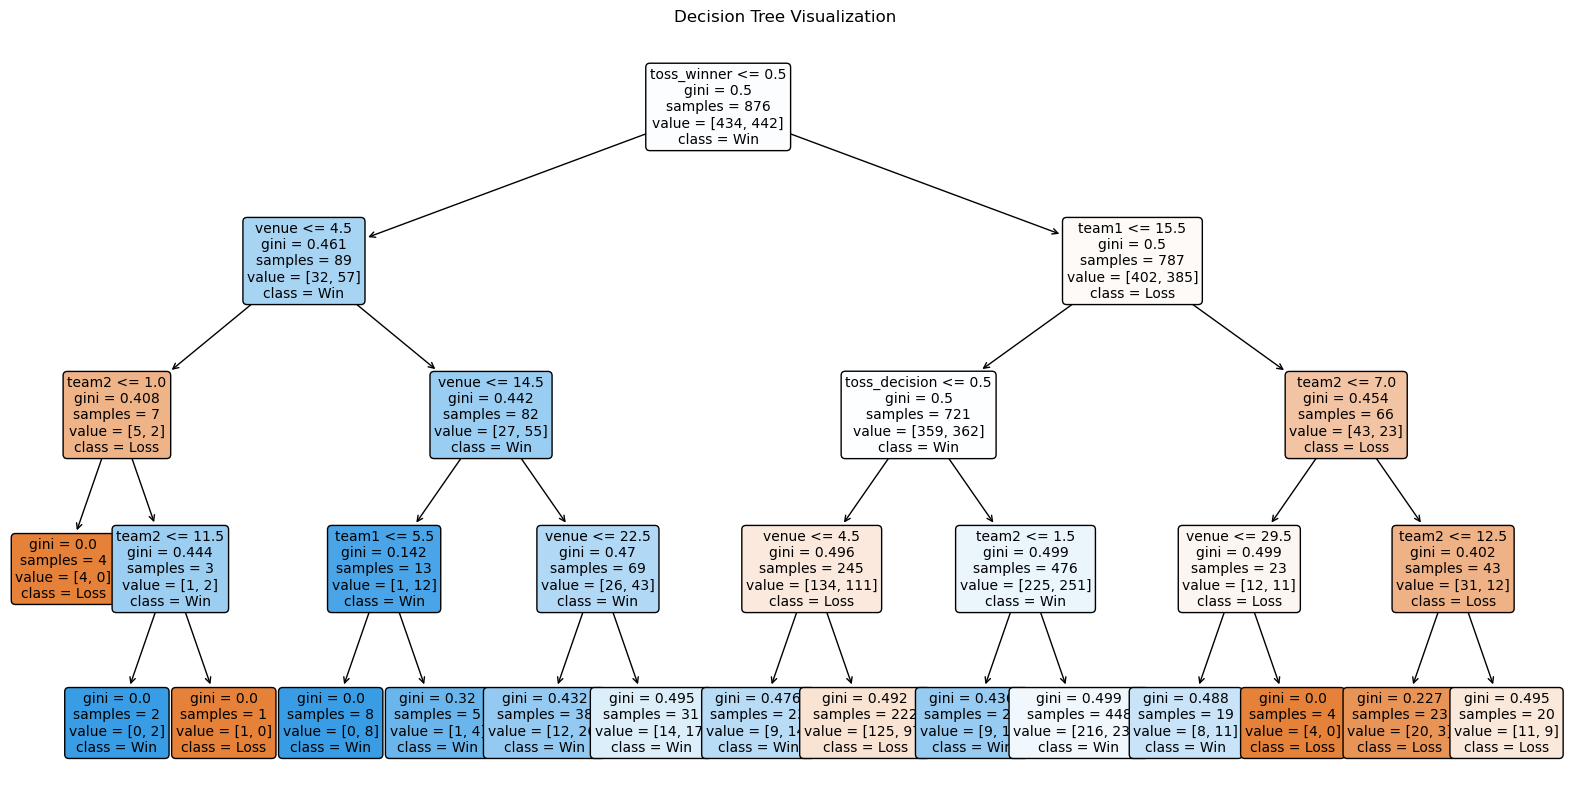


Player Dismissal Patterns for Game Strategy
Decision Tree Accuracy: 0.95
Confusion Matrix:
 [[49632     0     0     0     0     0     0     0     0     0]
 [  436     0     0     0     0     0     0     0     0     0]
 [ 1615     0     0     0     0     0     0     0     0     0]
 [   54     0     0     0     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0     0     0     0]
 [  172     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0]
 [    2     0     0     0     0     0     0     0     0     0]
 [  205     0     0     0     0     0     0     0     0     0]
 [   64     0     0     0     0     0     0     0     0     0]]


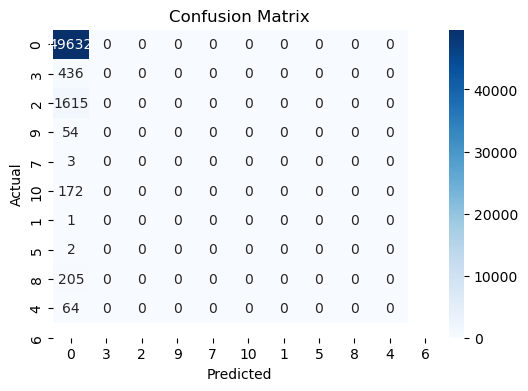

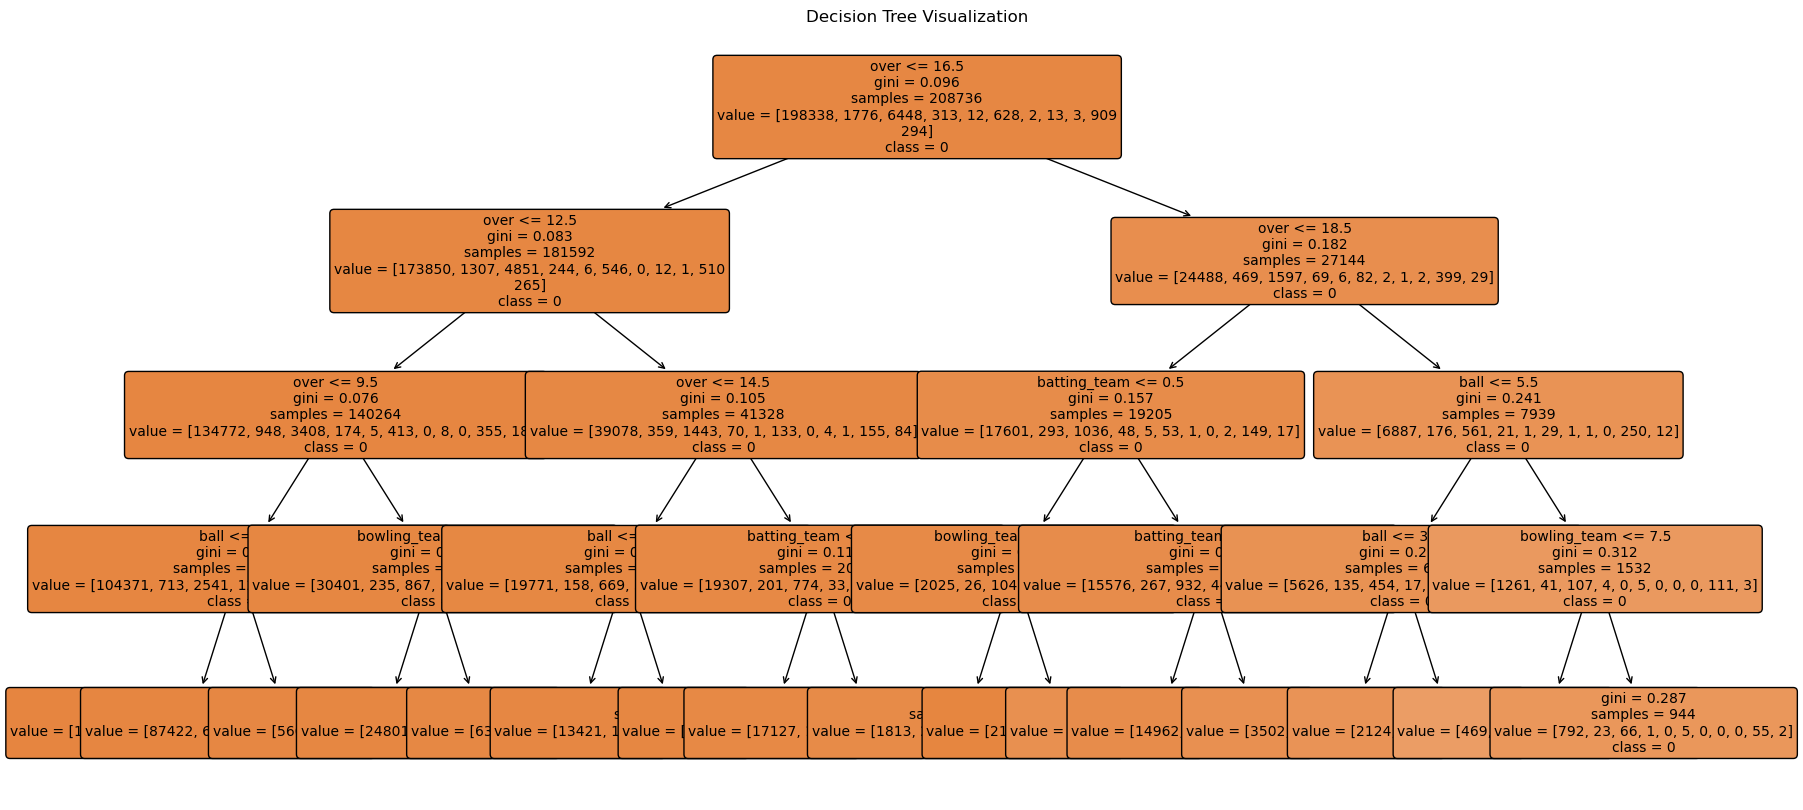


Consistent Player or Team Performance at Venues
Decision Tree Accuracy: 1.00
Confusion Matrix:
 [[1012    0]
 [   0  181]]


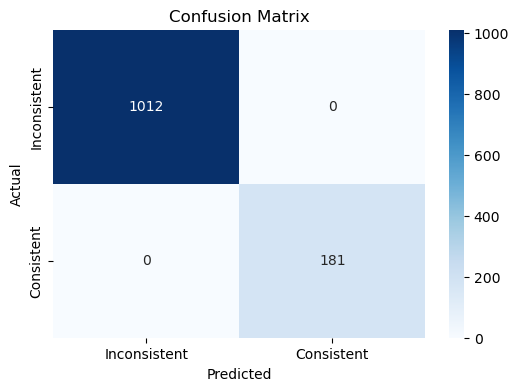

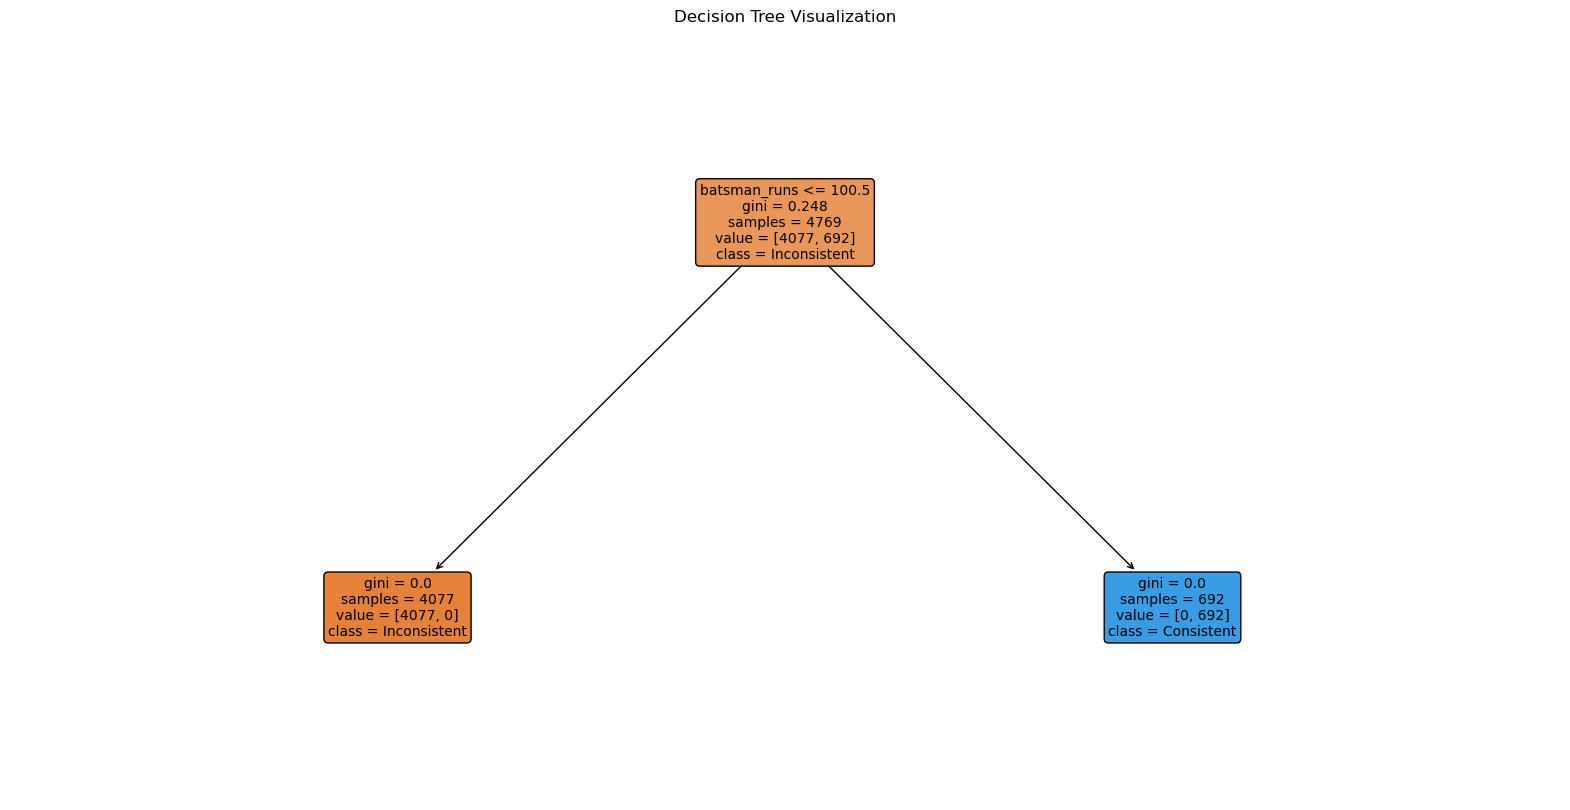

In [120]:
# Function to apply and plot Decision Trees with max_depth=4
def apply_decision_tree(X_train, X_test, y_train, y_test, feature_names, class_names):
    # Initialize the Decision Tree model with a max depth of 4
    model = DecisionTreeClassifier(max_depth=4, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display accuracy and confusion matrix
    print(f"Decision Tree Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", conf_matrix)

    # Plot the confusion matrix for better visualization
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Plot the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(model, feature_names=feature_names, class_names=[str(cls) for cls in class_names],
              filled=True, rounded=True, fontsize=10)
    plt.title("Decision Tree Visualization")
    plt.show()

# Define feature and class names based on the specific dataset (adjust as needed)
feature_names_toss = X_toss_train_encoded.columns
feature_names_dom = X_dom_train_encoded.columns
feature_names_toss_winner = X_toss_winner_train_encoded.columns
feature_names_dismissal = X_dismissal_train_encoded.columns
feature_names_venue_perf = X_venue_perf_train_encoded.columns

# Apply Decision Tree on each dataset

# 1. Toss Decision Impact on Match Outcomes
print("Toss Decision Impact on Match Outcomes")
apply_decision_tree(X_toss_train_encoded, X_toss_test_encoded, y_toss_train, y_toss_test, feature_names_toss, ['Loss', 'Win'])

# 2. Result Margin and Team Dominance
print("\nResult Margin and Team Dominance")
apply_decision_tree(X_dom_train_encoded, X_dom_test_encoded, y_dom_train, y_dom_test, feature_names_dom, ['Low', 'Medium', 'High'])

# 3. Toss Winners' Influence on Match Outcome
print("\nToss Winners' Influence on Match Outcome")
apply_decision_tree(X_toss_winner_train_encoded, X_toss_winner_test_encoded, y_toss_winner_train, y_toss_winner_test, feature_names_toss_winner, ['Loss', 'Win'])

# 4. Player Dismissal Patterns for Game Strategy
print("\nPlayer Dismissal Patterns for Game Strategy")
apply_decision_tree(X_dismissal_train_encoded, X_dismissal_test_encoded, y_dismissal_train, y_dismissal_test, feature_names_dismissal, [str(cls) for cls in y_dismissal_train.unique()])

# 5. Consistent Player or Team Performance at Venues
print("\nConsistent Player or Team Performance at Venues")
apply_decision_tree(X_venue_perf_train_encoded, X_venue_perf_test_encoded, y_performance_train, y_performance_test, feature_names_venue_perf, ['Inconsistent', 'Consistent'])


In [121]:
# Select relevant columns
df_toss = df_matches[['toss_decision', 'team1', 'team2', 'venue', 'winner']]

# Encode the winner as 1 (team1 wins) or 0 (team2 wins)
df_toss['match_outcome'] = (df_toss['winner'] == df_toss['team1']).astype(int)

# Drop 'winner' column as we now have 'match_outcome'
df_toss = df_toss.drop(columns=['winner'])

# Label encode categorical features
df_toss_encoded, toss_encoders = label_encode_df(df_toss)

# Define features and label
X_toss = df_toss_encoded[['toss_decision', 'team1', 'team2', 'venue']]
y_toss = df_toss_encoded['match_outcome']

# Split into training and testing sets
X_toss_train_decision, X_toss_test_decision, y_toss_train_decision, y_toss_test_decision = train_test_split(X_toss, y_toss, test_size=0.2, random_state=42)

/var/folders/0_/8c2dffcn0yjbw5pw1qm1s4_80000gn/T/ipykernel_58150/3589984671.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toss['match_outcome'] = (df_toss['winner'] == df_toss['team1']).astype(int)


In [123]:
df_toss.head()

,toss_decision,team1,team2,venue,match_outcome
0,1,15,8,19,0
1,0,6,0,28,0
2,0,3,13,12,1
3,0,10,15,42,0
4,0,8,1,11,1


In [125]:
df_matches[['toss_decision', 'team1', 'team2', 'venue', 'winner']].head()

,toss_decision,team1,team2,venue,winner
0,field,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders
1,bat,Kings XI Punjab,Chennai Super Kings,Punjab Cricket Association Stadium,Chennai Super Kings
2,bat,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Delhi Daredevils
3,bat,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Royal Challengers Bangalore
4,bat,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Kolkata Knight Riders


In [126]:
# Define dominance levels based on result margin
def classify_dominance(margin):
    margin = int(margin)
    if margin > 50:
        return 2  # High dominance
    elif margin > 20:
        return 1  # Medium dominance
    else:
        return 0  # Low dominance

# Apply classification to create dominance_level
df_matches['dominance_level'] = df_matches['result_margin'].apply(classify_dominance)

# Select relevant columns
df_dominance = df_matches[['result_margin', 'toss_decision', 'team1', 'team2', 'venue', 'dominance_level']]

# Label encode categorical features
df_dominance_encoded, dominance_encoders = label_encode_df(df_dominance)

# Define features and label
X_dom = df_dominance_encoded[['result_margin', 'toss_decision', 'team1', 'team2', 'venue']]
y_dom = df_dominance_encoded['dominance_level']

# Split into training and testing sets
X_dom_train_decision, X_dom_test_decision, y_dom_train_decision, y_dom_test_decision = train_test_split(X_dom, y_dom, test_size=0.2, random_state=42)


/var/folders/0_/8c2dffcn0yjbw5pw1qm1s4_80000gn/T/ipykernel_58150/2576832019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
/var/folders/0_/8c2dffcn0yjbw5pw1qm1s4_80000gn/T/ipykernel_58150/2576832019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
/var/folders/0_/8c2dffcn0yjbw5pw1qm1s4_80000gn/T/ipykernel_58150/2576832019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [129]:
df_dominance.head()

,result_margin,toss_decision,team1,team2,venue,dominance_level
0,140.0,1,15,8,19,2
1,33.0,0,6,0,28,1
2,9.0,0,3,13,12,0
3,5.0,0,10,15,42,0
4,5.0,0,8,1,11,0


In [130]:
df_matches[['result_margin', 'toss_decision', 'team1', 'team2', 'venue', 'dominance_level']].head()

,result_margin,toss_decision,team1,team2,venue,dominance_level
0,140.0,field,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,2
1,33.0,bat,Kings XI Punjab,Chennai Super Kings,Punjab Cricket Association Stadium,1
2,9.0,bat,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,0
3,5.0,bat,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,0
4,5.0,bat,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,0


In [132]:
# Ensure 'match_id' exists in both datasets
df_combined = df_delivery.merge(df_matches[['id', 'venue']], left_on='match_id', right_on='id', how='left')

# Aggregate player performance by venue
df_player_venue = df_combined.groupby(['batter', 'venue']).agg({
    'batsman_runs': 'sum',  # Total runs scored by player at each venue
    'total_runs': 'sum'    # Total team runs at each venue
}).reset_index()

# Define performance threshold for "Consistent" (e.g., total runs > 100)
def label_performance(runs):
    return 1 if runs > 100 else 0

# Apply consistency label
df_player_venue['consistent_performer'] = df_player_venue['batsman_runs'].apply(label_performance)

# Filter relevant columns
df_performance = df_player_venue[['batter', 'venue', 'batsman_runs', 'total_runs', 'consistent_performer']]

# Label encode categorical features
df_performance_encoded, performance_encoders = label_encode_df(df_performance)

# Define features and label
X_performance = df_performance_encoded[['batter', 'venue', 'total_runs']]
y_performance = df_performance_encoded['consistent_performer']

# Split into training and testing sets
X_performance_train_decision, X_performance_test_decision, y_performance_train_decision, y_performance_test_decision = train_test_split(X_performance, y_performance, test_size=0.2, random_state=42)

In [135]:
df_performance.head()

,batter,venue,batsman_runs,total_runs,consistent_performer
0,0,9,28,29,0
1,0,11,4,4,0
2,0,12,16,16,0
3,0,19,35,35,0
4,0,20,39,39,0


In [136]:
df_player_venue[['batter', 'venue', 'batsman_runs', 'total_runs', 'consistent_performer']].head()

,batter,venue,batsman_runs,total_runs,consistent_performer
0,A Ashish Reddy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,28,29,0
1,A Ashish Reddy,Eden Gardens,4,4,0
2,A Ashish Reddy,Feroz Shah Kotla,16,16,0
3,A Ashish Reddy,M Chinnaswamy Stadium,35,35,0
4,A Ashish Reddy,MA Chidambaram Stadium,39,39,0


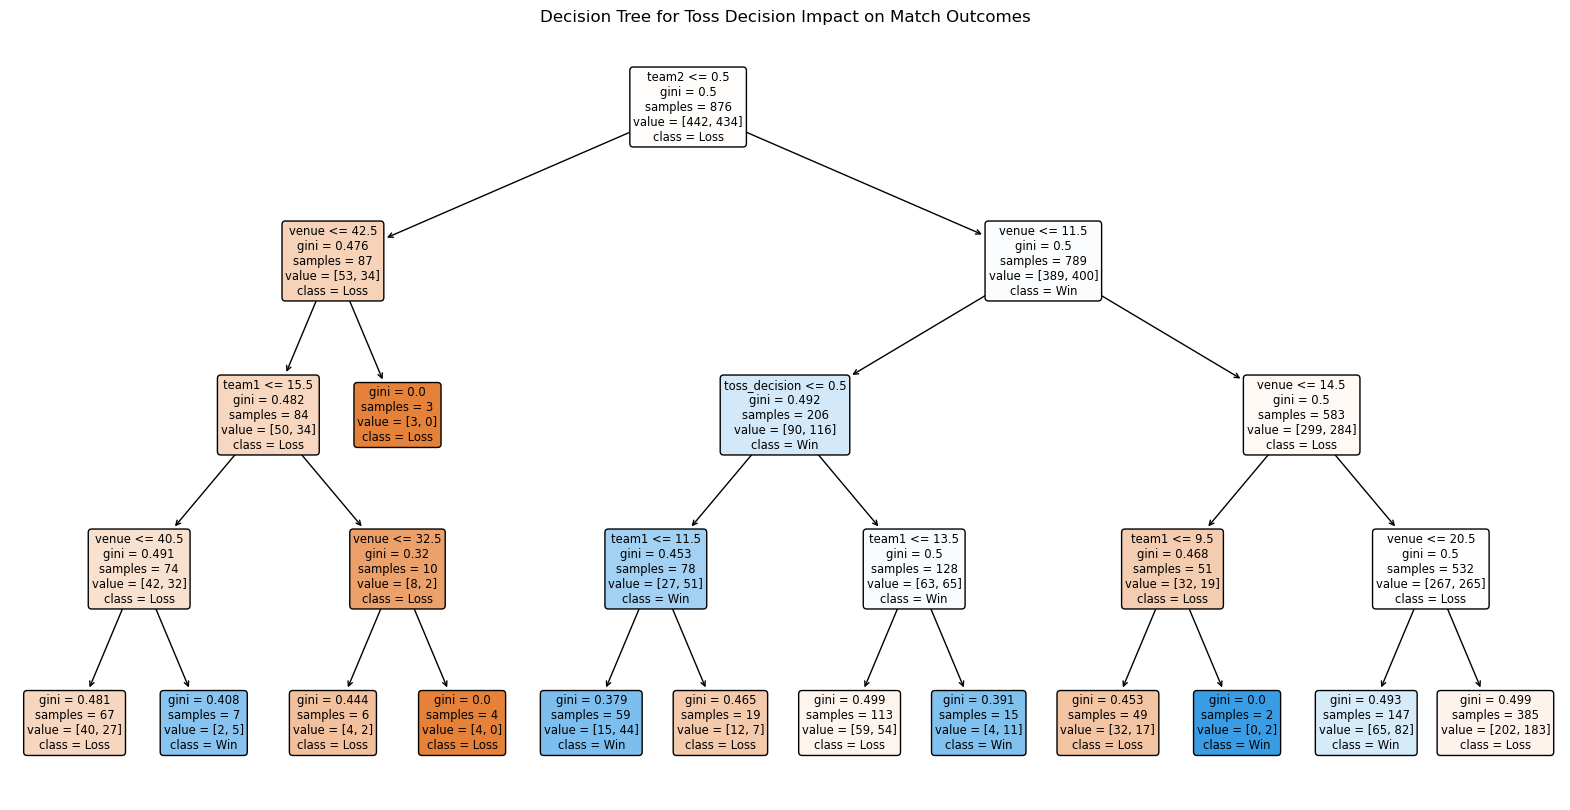

In [137]:
# Initialize Decision Tree with max depth for simplicity
toss_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
toss_tree.fit(X_toss_train_decision, y_toss_train_decision)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    toss_tree, 
    feature_names=X_toss_train_decision.columns, 
    class_names=["Loss", "Win"], 
    filled=True, 
    rounded=True
)
plt.title("Decision Tree for Toss Decision Impact on Match Outcomes")
plt.show()

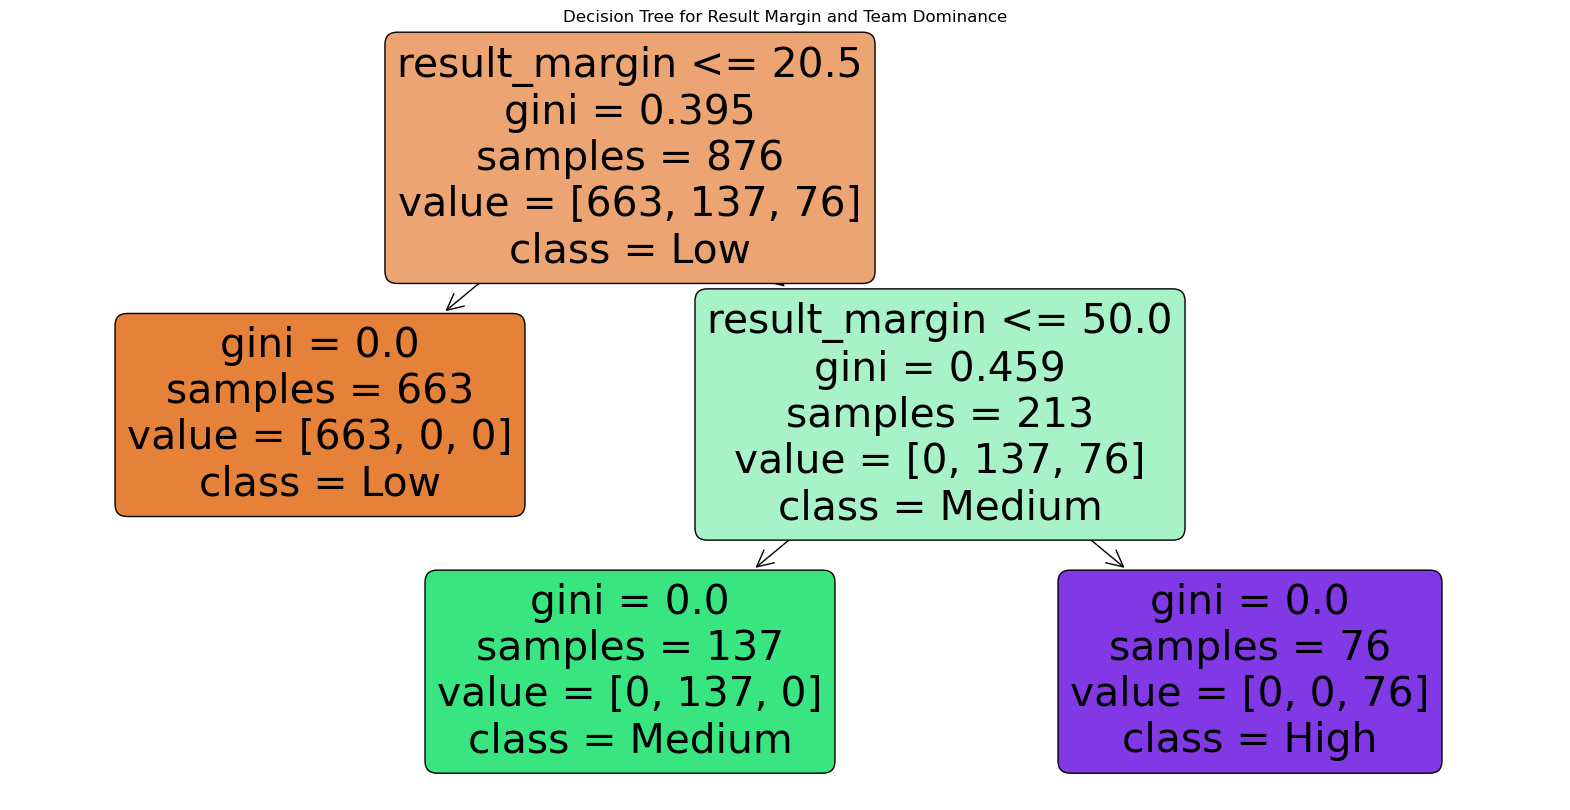

In [139]:
# Initialize Decision Tree with max depth
dominance_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
dominance_tree.fit(X_dom_train_decision, y_dom_train_decision)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dominance_tree, 
    feature_names=X_dom_train_decision.columns, 
    class_names=["Low", "Medium", "High"], 
    filled=True, 
    rounded=True
)
plt.title("Decision Tree for Result Margin and Team Dominance")
plt.show()

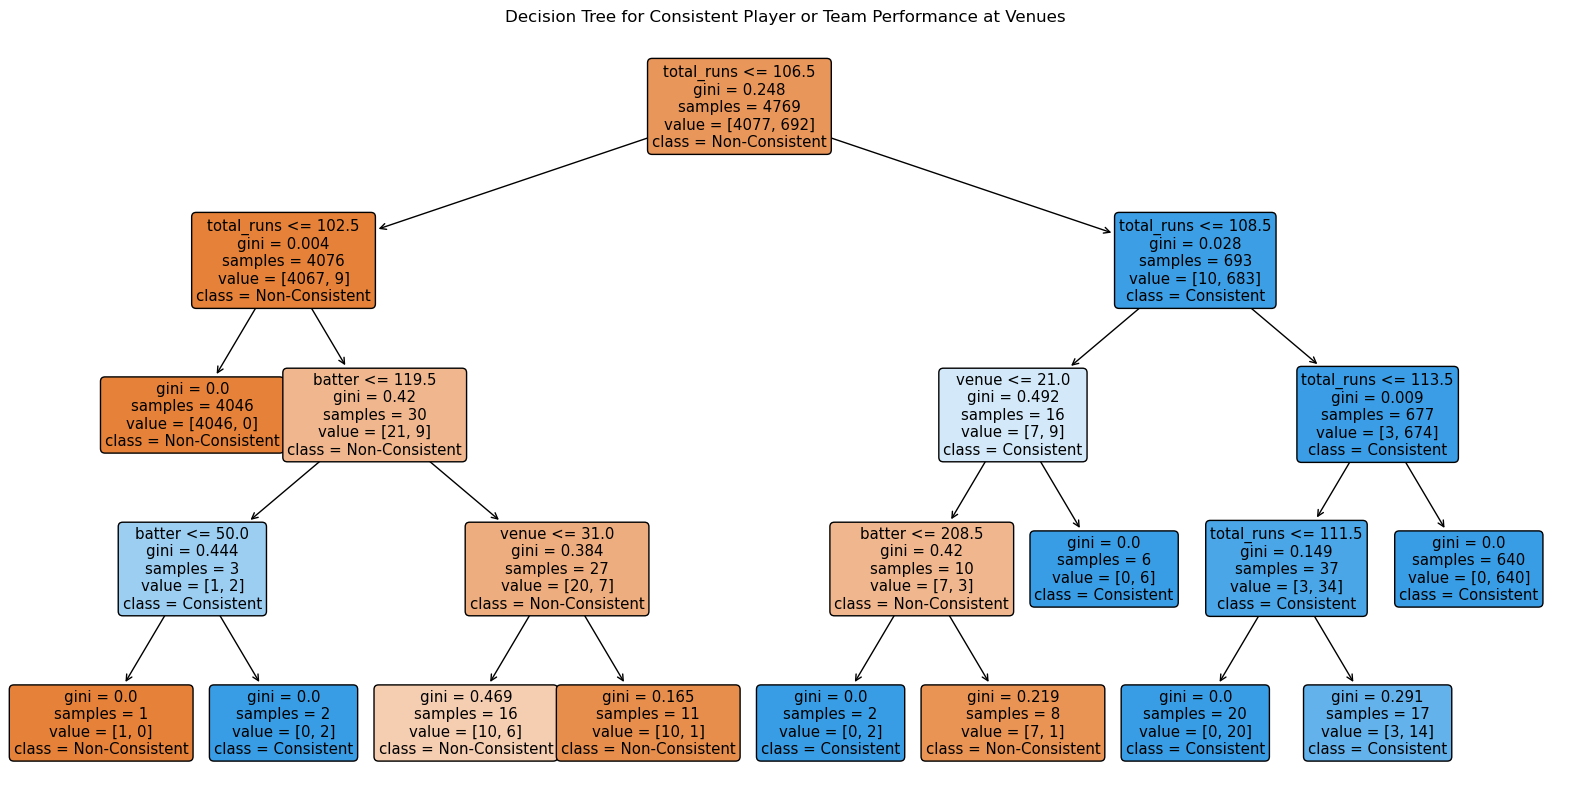

In [140]:
# Initialize Decision Tree with max depth
performance_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
performance_tree.fit(X_performance_train_decision, y_performance_train_decision)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    performance_tree, 
    feature_names=X_performance_train_decision.columns, 
    class_names=["Non-Consistent", "Consistent"], 
    filled=True, 
    rounded=True
)
plt.title("Decision Tree for Consistent Player or Team Performance at Venues")
plt.show()

Accuracy for Toss Decision Impact on Match Outcomes: 0.48


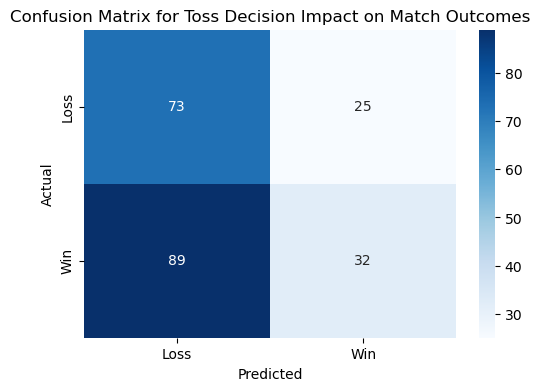

In [141]:
# Predict on test data
y_toss_pred = toss_tree.predict(X_toss_test_decision)

# Calculate accuracy
accuracy_toss = accuracy_score(y_toss_test_decision, y_toss_pred)
print(f"Accuracy for Toss Decision Impact on Match Outcomes: {accuracy_toss:.2f}")

# Confusion Matrix
conf_matrix_toss = confusion_matrix(y_toss_test_decision, y_toss_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_toss, annot=True, fmt="d", cmap="Blues", xticklabels=["Loss", "Win"], yticklabels=["Loss", "Win"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Toss Decision Impact on Match Outcomes")
plt.show()

Accuracy for Result Margin and Team Dominance: 1.00


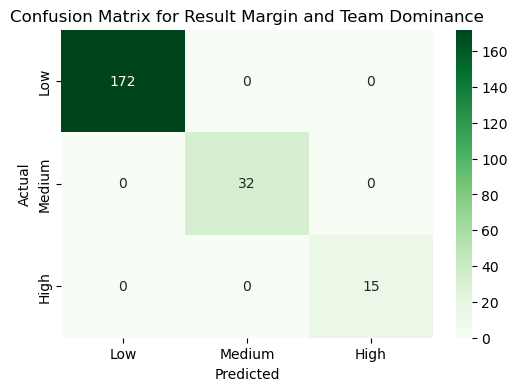

In [144]:
# Predict on test data
y_dom_pred = dominance_tree.predict(X_dom_test_decision)

# Calculate accuracy
accuracy_dom = accuracy_score(y_dom_test_decision, y_dom_pred)
print(f"Accuracy for Result Margin and Team Dominance: {accuracy_dom:.2f}")

# Confusion Matrix
conf_matrix_dom = confusion_matrix(y_dom_test_decision, y_dom_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dom, annot=True, fmt="d", cmap="Greens", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Result Margin and Team Dominance")
plt.show()


Accuracy for Consistent Player or Team Performance at Venues: 0.99


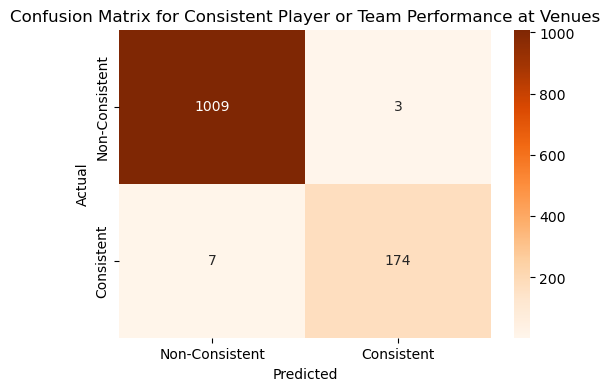

In [145]:
# Predict on test data
y_perf_pred = performance_tree.predict(X_performance_test_decision)

# Calculate accuracy
accuracy_perf = accuracy_score(y_performance_test_decision, y_perf_pred)
print(f"Accuracy for Consistent Player or Team Performance at Venues: {accuracy_perf:.2f}")

# Confusion Matrix
conf_matrix_perf = confusion_matrix(y_performance_test_decision, y_perf_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_perf, annot=True, fmt="d", cmap="Oranges", xticklabels=["Non-Consistent", "Consistent"], yticklabels=["Non-Consistent", "Consistent"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Consistent Player or Team Performance at Venues")
plt.show()

In [147]:
# Merge match and delivery data on id and match_id
df_merged_regression = pd.merge(df_delivery, df_matches, left_on='match_id', right_on='id', how='inner')

In [150]:
df_merged_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260920 entries, 0 to 260919
Data columns (total 41 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       260920 non-null  object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  260920 non-null  object 
 15  dismissal_kind    260920 non-null  object 
 16  fielder           26

In [151]:
# Create a target variable 'toss_win_result'
df_merged_regression['toss_win_result'] = (df_merged_regression['toss_winner'] == df_merged_regression['winner']).astype(int)

# Select relevant features
df_features = df_merged_regression[['toss_decision', 'venue', 'team1', 'team2', 'batsman_runs', 'over', 'inning', 'toss_win_result']]

# Encode categorical features
label_encoders = {}
for column in ['toss_decision', 'venue', 'team1', 'team2']:
    le = LabelEncoder()
    df_features[column] = le.fit_transform(df_features[column])
    label_encoders[column] = le

# Define features (X) and label (y)
X = df_features[['toss_decision', 'venue', 'team1', 'team2', 'batsman_runs', 'over', 'inning']]
y = df_features['toss_win_result']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/var/folders/0_/8c2dffcn0yjbw5pw1qm1s4_80000gn/T/ipykernel_58150/3680912449.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[column] = le.fit_transform(df_features[column])
/var/folders/0_/8c2dffcn0yjbw5pw1qm1s4_80000gn/T/ipykernel_58150/3680912449.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[column] = le.fit_transform(df_features[column])
/var/folders/0_/8c2dffcn0yjbw5pw1qm1s4_80000gn/T/ipykernel_58150/3680912449.py:11: SettingWithCopyWarning: 
A value is trying to be se

In [156]:
# Standardize the features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Predict and evaluate logistic regression model
y_pred_logistic = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_conf_matrix = confusion_matrix(y_test, y_pred_logistic)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Confusion Matrix:\n", logistic_conf_matrix)


Logistic Regression Accuracy: 0.5386516940058256
Logistic Regression Confusion Matrix:
 [[12809 13204]
 [10871 15300]]


Logistic Regression Accuracy: 0.5386516940058256
Multinomial Naïve Bayes Accuracy: 0.5387283458531351


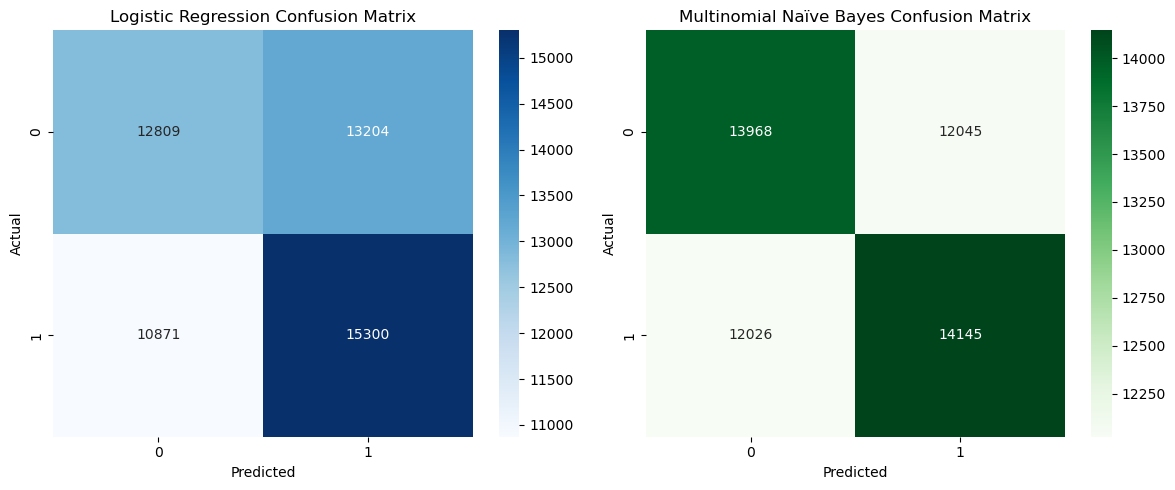

In [161]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Multinomial Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)  # Naive Bayes usually doesn't require scaling

# Predictions and Confusion Matrices
# Logistic Regression Predictions and Confusion Matrix
y_pred_logistic = logistic_model.predict(X_test_scaled)
logistic_conf_matrix = confusion_matrix(y_test, y_pred_logistic)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)

# Multinomial Naïve Bayes Predictions and Confusion Matrix
y_pred_nb = nb_model.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# Print accuracy scores for comparison
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Multinomial Naïve Bayes Accuracy:", nb_accuracy)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(logistic_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Multinomial Naïve Bayes Confusion Matrix
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Multinomial Naïve Bayes Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()


In [164]:
X_train.head(10)

,toss_decision,venue,team1,team2,batsman_runs,over,inning
196113,1,43,12,2,6,8,1
77002,1,29,16,11,2,3,2
188630,0,36,15,6,0,16,1
48197,1,20,0,11,1,17,2
250582,1,11,9,8,0,4,2
237054,1,28,12,10,1,9,2
165015,1,11,16,8,6,8,1
91213,1,12,3,6,1,7,2
146489,1,19,15,6,6,9,2
237695,1,20,10,0,1,1,2


In [165]:
X_test.head(10)

,toss_decision,venue,team1,team2,batsman_runs,over,inning
84890,0,42,10,15,1,12,1
9843,1,29,1,10,1,4,2
214974,1,22,0,5,4,17,1
11025,0,20,0,15,0,13,2
76680,1,19,15,10,0,10,1
87949,0,42,10,0,0,1,1
59650,1,19,15,3,0,8,2
77286,0,12,3,13,0,10,2
43875,0,7,11,7,2,7,2
198788,1,23,15,2,1,9,1


In [167]:
y_test.head(10)

84890     1
9843      0
214974    1
11025     1
76680     0
87949     1
59650     0
77286     1
43875     0
198788    0
Name: toss_win_result, dtype: int64

In [168]:
y_train.head(10)

196113    1
77002     0
188630    0
48197     0
250582    1
237054    1
165015    1
91213     1
146489    0
237695    1
Name: toss_win_result, dtype: int64

/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


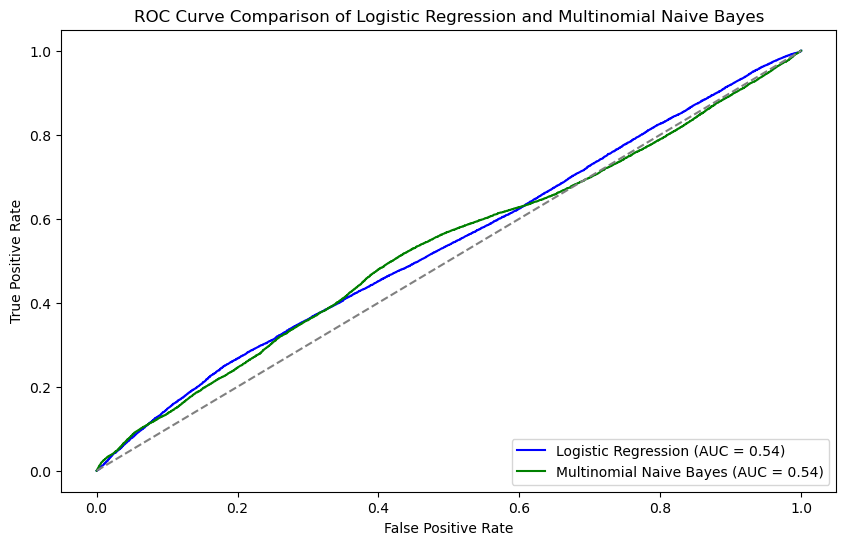

In [170]:
# Logistic Regression ROC Curve
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
logistic_auc = roc_auc_score(y_test, y_pred_logistic)

# Multinomial Naive Bayes ROC Curve
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
nb_auc = roc_auc_score(y_test, y_pred_nb)

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(logistic_fpr, logistic_tpr, color='blue', label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, color='green', label=f'Multinomial Naive Bayes (AUC = {nb_auc:.2f})')

# Plotting the diagonal line for random guess
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Logistic Regression and Multinomial Naive Bayes')
plt.legend(loc="lower right")
plt.show()